In [39]:
import os
import shutil
import shap
import numpy as np
import tensorflow as tf
from keras.utils import image_dataset_from_directory, load_img
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Input, Activation, Flatten, Conv2D, MaxPooling2D,  Dense
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy


 



In [40]:
data = image_dataset_from_directory(
    'flowers',
    image_size=(128, 128),
    batch_size=32 
)

Found 1517 files belonging to 2 classes.


In [41]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [42]:
images, labels = [], []
for image, label in data:
    images.append(image.numpy())
    labels.append(label.numpy())
images, labels = np.concatenate(images), np.concatenate(labels)
images /= 255.0

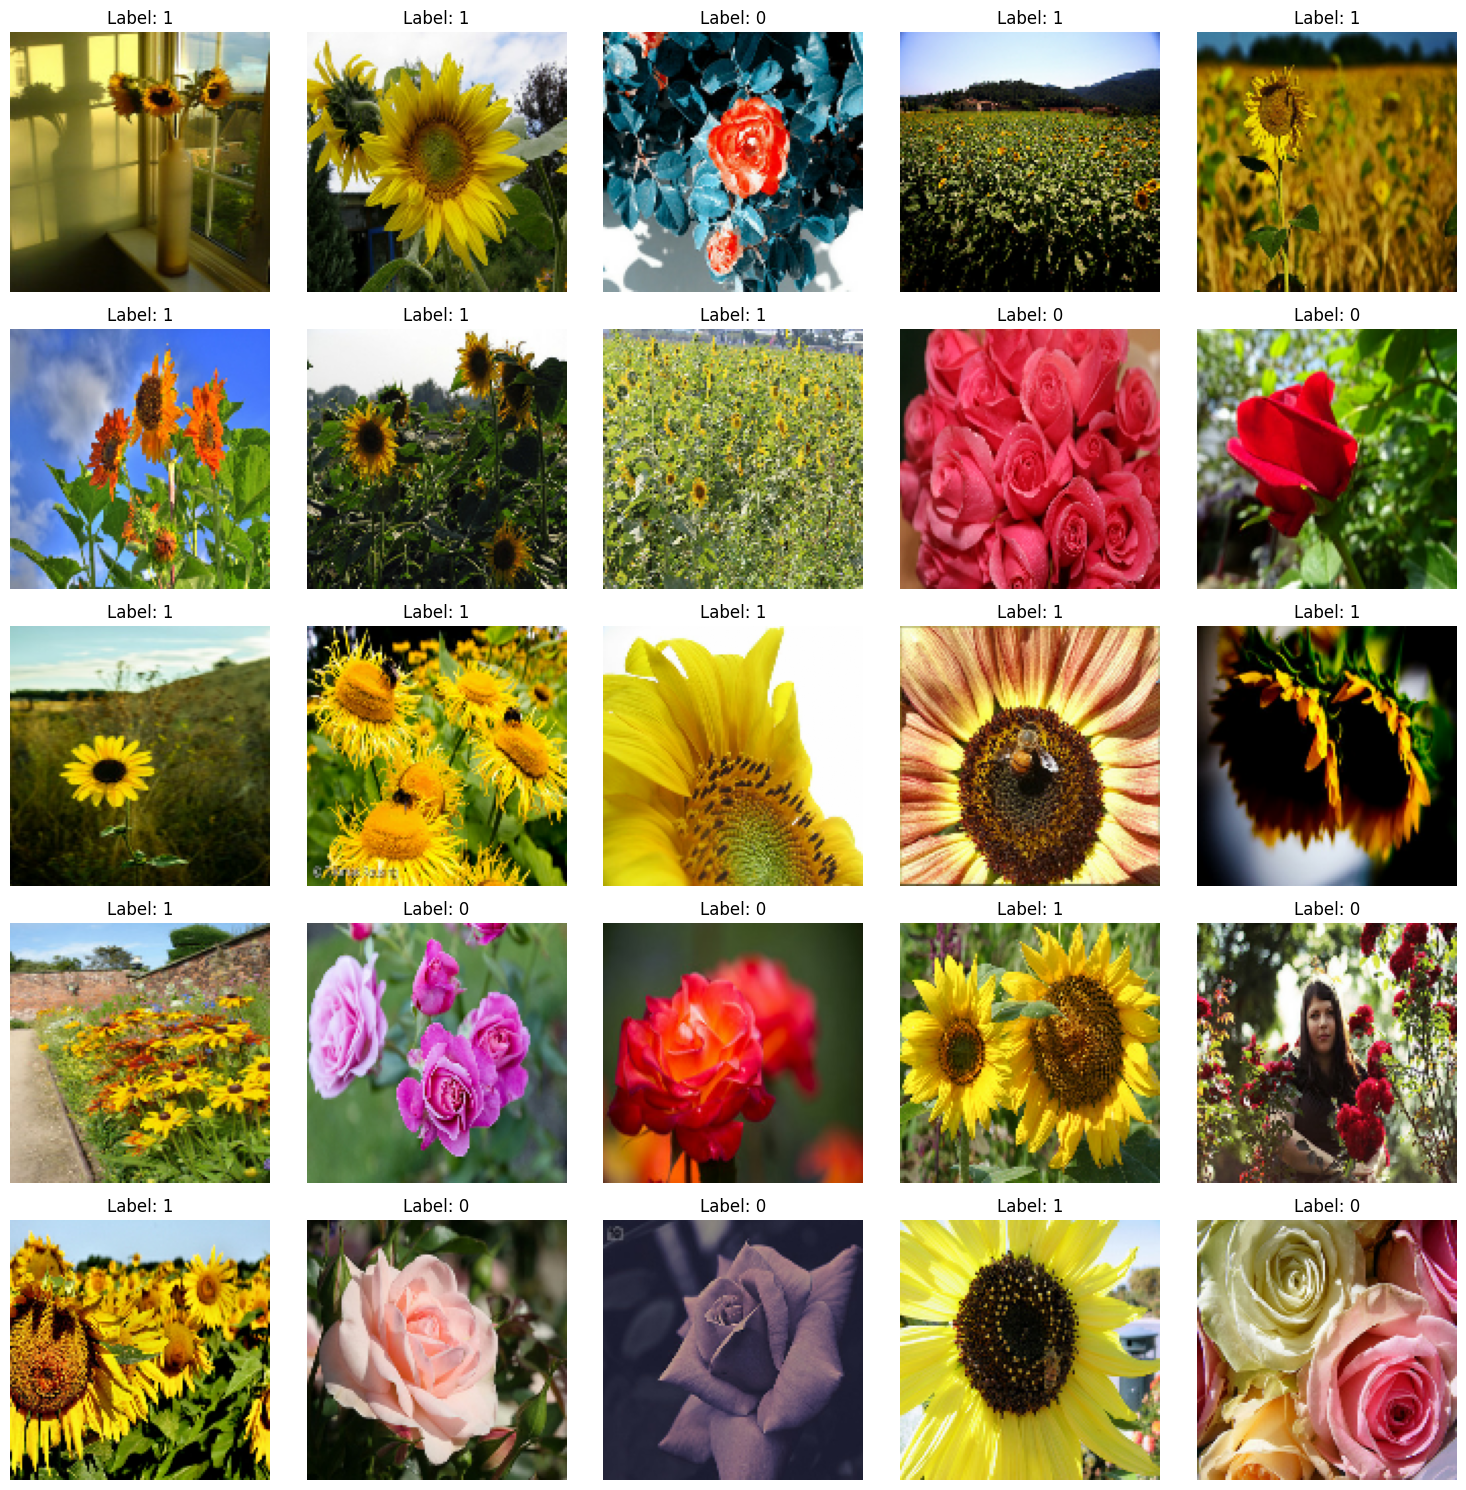

In [43]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f"Label: {labels[i]}")

plt.tight_layout()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, shuffle=True, random_state=11, stratify=labels)

In [45]:
inputs = Input(shape=(128, 128, 3), name="Input")
x = Conv2D(32, 3, activation="relu", padding='same', name='Conv1')(inputs)
x = MaxPooling2D(2, name='Pool1')(x)
x = Conv2D(16, 3, activation="relu", padding='same', name='Conv2')(x)
x = MaxPooling2D(2, name='Pool2')(x)
x = Flatten(name='Vectorize')(x)
x = Dense(3, name='FC')(x)
outputs = Activation("softmax", name='Softmax')(x)
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['acc'])
model.summary()

hist = model.fit(
    X_train,
    to_categorical(y_train, 3),
    batch_size=32,
    epochs=10,
    validation_split=0.15,
    shuffle='on'
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Vectorize (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC (Dense)                      │ (None, 3)              │        49,155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Activation)            │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,675 (213.57 KB)

 Trainable params: 54,675 (213.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - acc: 0.7015 - loss: 0.5852 - val_acc: 0.8889 - val_loss: 0.2887
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 0.8929 - loss: 0.2701 - val_acc: 0.9064 - val_loss: 0.2623
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 0.9187 - loss: 0.2269 - val_acc: 0.8947 - val_loss: 0.2609
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - acc: 0.9299 - loss: 0.1946 - val_acc: 0.9123 - val_loss: 0.2390
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - acc: 0.9377 - loss: 0.1826 - val_acc: 0.9006 - val_loss: 0.2586
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - acc: 0.9576 - loss: 0.1308 - val_acc: 0.8889 - val_loss: 0.2811
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - acc: 0.9497 - loss: 0.1562 - val_acc: 0.9064 - val_loss: 0.2402
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - acc: 0.9715 - loss: 0.1019 - val_acc: 0.9064 - val_loss: 0.2313
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - acc: 0.9840

In [46]:
y_hat=model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [47]:
print('Acc=',np.sum(y_hat.argmax(1)==y_test)/y_test.shape[0])

Acc= 0.8789473684210526


  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:11, 11.76s/it]               


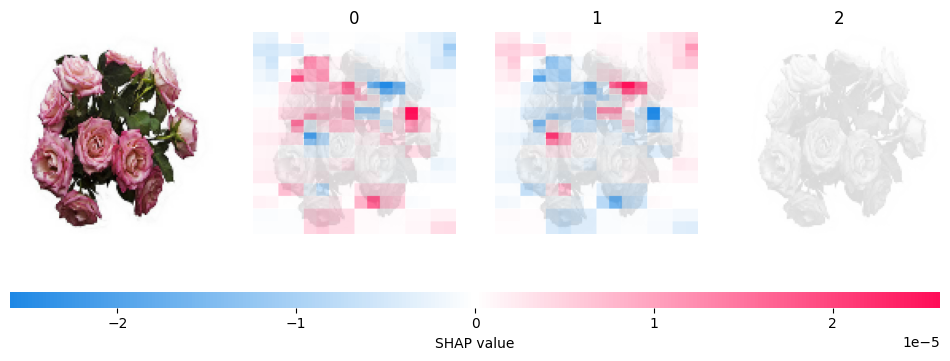

In [48]:
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(128,128)", X_test[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(3)))
ind=[311]
shap_values_ = explainer( X_test[ind], max_evals=5000, batch_size=50 )     
shap.image_plot(shap_values_,labels=[0,1,2])

In [49]:
# Parameters
input_shape = (128, 128, 3)
num_prototypes = 10  # Number of prototypes to learn
num_classes = 3      # Number of output classes

# Step 1: Feature Extractor (CNN Backbone)
def build_feature_extractor(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Simple CNN model (can use pre-trained backbones like ResNet, VGG, etc.)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Add more convolutional layers for deeper feature extraction
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    feature_extractor = models.Model(inputs, x)
    return feature_extractor

# Step 2: Prototype Layer
class PrototypeLayer(tf.keras.layers.Layer):
    def __init__(self, num_prototypes, prototype_shape):
        super(PrototypeLayer, self).__init__()
        # Prototypes are learnable, initialized randomly
        self.prototypes = self.add_weight(shape=(num_prototypes, *prototype_shape), 
                                          initializer='random_normal', trainable=True)

    def call(self, feature_maps):
        # Reshape the feature maps for comparison
        feature_maps_exp = tf.expand_dims(feature_maps, axis=1)  # [batch, 1, height, width, channels]
        # Compute squared L2 distances
        distances = tf.reduce_sum((feature_maps_exp - self.prototypes) ** 2, axis=[-3, -2, -1])
        # Similarity score is negative L2 distance
        return -distances  # Higher value indicates closer match

# Step 3: Build ProtoPNet
def build_protoPNet(input_shape, num_prototypes, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Feature extractor
    feature_extractor = build_feature_extractor(input_shape)
    feature_maps = feature_extractor(inputs)
    
    # Prototype layer
    prototype_shape = feature_maps.shape[1:]  # Shape of the feature maps
    prototype_layer = PrototypeLayer(num_prototypes, prototype_shape)
    prototype_distances = prototype_layer(feature_maps)
    
    # Classification layer (fully connected)
    logits = layers.Dense(num_classes, activation=None)(prototype_distances)
    outputs = layers.Activation('softmax')(logits)
    
    # Build the model
    model = models.Model(inputs, outputs)
    return model

# Create and compile the ProtoPNet model
protoPNet = build_protoPNet(input_shape, num_prototypes, num_classes)
protoPNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])

protoPNet.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 16, 16, 256)    │       370,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prototype_layer                 │ (None, 10)             │       655,360 │
│ (PrototypeLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,026,209 (3.91 MB)

 Trainable params: 1,026,209 (3.91 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Assuming X_train, y_train, X_test, y_test have already been preprocessed


# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Train the model
protoPNet.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.15)

# Evaluate the model on test data
test_loss, test_acc = protoPNet.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4603 - loss: 23.3032 - val_accuracy: 0.4912 - val_loss: 1.6152
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4773 - loss: 1.1974 - val_accuracy: 0.7602 - val_loss: 0.4883
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8049 - loss: 0.4390 - val_accuracy: 0.8421 - val_loss: 0.4353
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 969ms/step - accuracy: 0.7999 - loss: 0.5334 - val_accuracy: 0.8889 - val_loss: 0.3094
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9032 - loss: 0.2923 - val_accuracy: 0.8421 - val_loss: 0.4107
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8752 - loss: 0.3311 - val_accuracy: 0.8947 - val_loss: 0.3509
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9005 - loss: 0.2512 - val_accuracy: 0.8596 - val_loss: 0.3800
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8500 - loss: 0.3824 - val_accuracy: 0.9064 - val_l

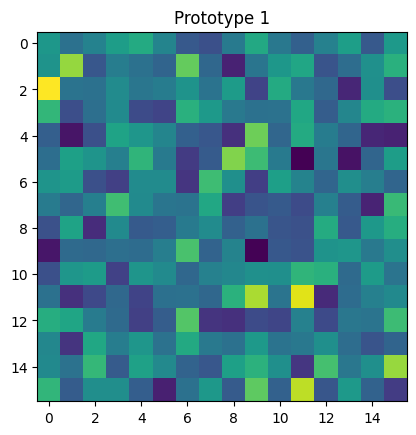

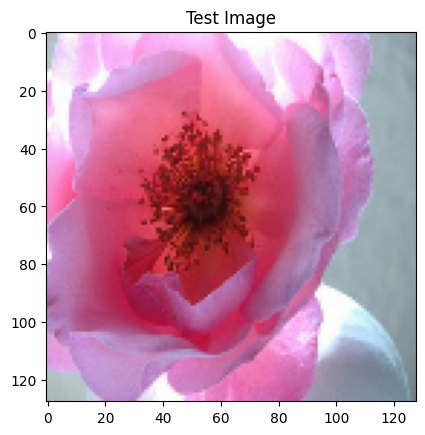

In [51]:

# Get the prototypes from the trained model
prototypes = protoPNet.layers[2].prototypes.numpy()

# Reduce dimensions for visualization
prototype_image = np.mean(prototypes[0], axis=-1)  # Averaging over the channels

# Plot a prototype
plt.imshow(prototype_image, cmap='viridis')
plt.title("Prototype 1")
plt.show()

# Plot an example input image and highlight which part matched the prototype
example_image = X_test[0]
plt.imshow(example_image)
plt.title("Test Image")
plt.show()


In [52]:
def compute_prototypes(X_train, y_train):
    # Calculate prototypes for each class
    prototypes = []
    for i in range(2):
        class_images = X_train[y_train == i]
        prototype = np.mean(class_images, axis=0)  # Taking the mean as a prototype
        prototypes.append(prototype)
    return np.array(prototypes)

prototypes = compute_prototypes(X_train,y_train)

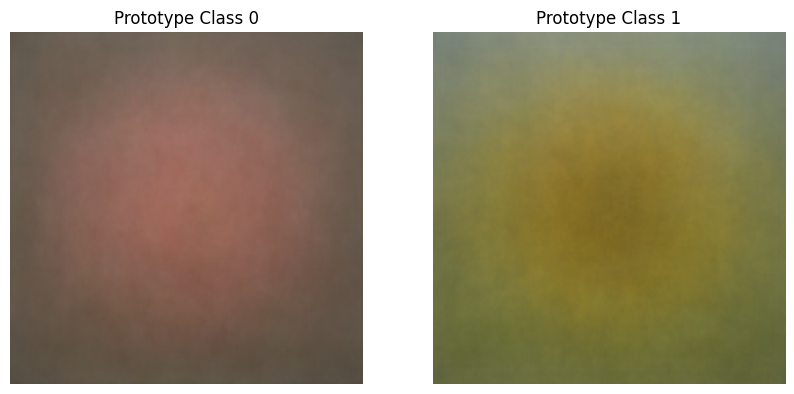

In [53]:
def visualize_prototypes(prototypes):
    plt.figure(figsize=(10, 5))
    for i, prototype in enumerate(prototypes):
        plt.subplot(1, len(prototypes), i + 1)
        plt.imshow(prototype)
        plt.title(f'Prototype Class {i}')
        plt.axis('off')
    plt.show()


prototypes = compute_prototypes(X_train, y_train)
visualize_prototypes(prototypes)